# 피벗 테이블 시작

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic=sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 피벗 테이블 등장 배경

In [3]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [4]:
#좌석 등급과 성별 단위로 그룹을 나누고 생존율을 선택하고 평균 집계를 적용하고 결과 그룹을 결합한 후 숨겨진 다차원성을 드러내기위해
#계층적 인덱스를 분할
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# 피벗 테이블 구문

In [5]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [6]:
#다단계 피벗 테이블
#세 번째 차원으로 연령을 보고 싶을 수 있을때 pd.cut 함수를 사용해 연령을 추가
age=pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [7]:
#열 기준으로 동작
#지불된 비용에 대한 정보를 추가
fare=pd.qcut(titanic['fare'],2)
titanic.pivot_table('survived',['sex',age],[fare,'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [8]:
#기타 피벗 테이블 옵션
#DataFrame.pivot_table(data,values=None,index=None,columns=None,
#                      aggfunc='mean',fill_value=None,margins=False,
#                      dropna=True,margins_name='All')
#열을 원하는 집게 방식에 매핑한 딕셔너리로 지정할 수도 있다
#values 키워드는 aggfunc을 위한 매핑을 지정할 때 이 키워드가 자동으로 지정되기 때문에 생략 가능
titanic.pivot_table(index='sex',columns='class',
                   aggfunc={'survived':sum,'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [9]:
#margins함수를 이용해 그룹별 총합을 계산
#가장자리의 열과 행의 명칭은 margins_name 키워드로 지정할수 있고 지정하지 않으면 기본으로 'All'로 표시
titanic.pivot_table('survived',index='sex',columns='class',margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


# 예제: 출생률 데이터

In [10]:
births=pd.read_csv('births.csv')

In [11]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [12]:
#decade 함수로 연대 열을 추가하고 연대별 남녀의 출생 수 확인
births['decade']=10*(births['year']//10)
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


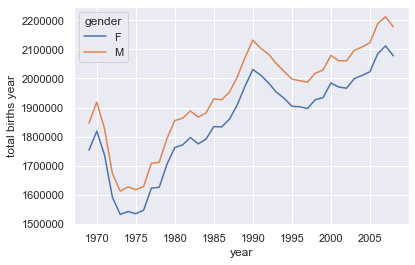

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()
plt.ylabel('total births year');

In [14]:
#추가 데이터 탐색
#날짜 오타나 누락된값으로 인한 이상치를 제거
 #시그마 클리피 연산
quartiles=np.percentile(births['births'],[25,50,75])
mu=quartiles[1]
sig=0.74*(quartiles[2]-quartiles[0])

In [15]:
#query() 메서드를 사용해 값에서 벗어난 출생 수를 가진 행을 걸러낼 수 있다
births=births.query('(births>@mu-5*@sig) & (births<@mu+5*@sig)')

In [16]:
#day 열을 정수형으로 설정
#이전에는 데이터세트의 일부 열이 'null'값을 포함했기 떄문에 데이터 타입이 문자열이었다
births['day']=births['day'].astype('int')

In [17]:
#날짜, 월, 연도를 결합해 Date 인덱스를 생성
births.index=pd.to_datetime(10000*births.year+
                           100*births.month+
                           births.day,format='%Y%m%d')
births['dayofweek']=births.index.dayofweek

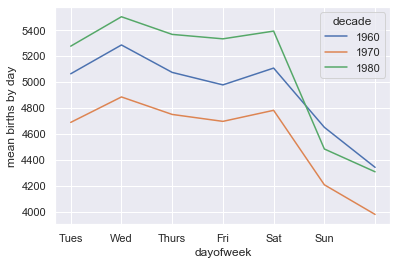

In [18]:
import matplotlib as mpl
births.pivot_table('births',index='dayofweek',
                  columns='decade',aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.ylabel('mean births by day');

In [19]:
#결과로 월과 일을 인덱스로 가지는 다중 인덱스를 얻게 된다
births_by_date=births.pivot_table('births',
                                 [births.index.month,births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625